In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('FinTech Data.csv')
dataset.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [3]:
X = dataset.iloc[:,0:16].values
X
y = dataset.iloc[:,16].values
y

array(['no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', '

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:,0] = labelencoder.fit_transform(X[:,0])
X[:,2] = labelencoder.fit_transform(X[:,2])
X[:,5] = labelencoder.fit_transform(X[:,5])
X[:,6] = labelencoder.fit_transform(X[:,6])
X[:,15] = labelencoder.fit_transform(X[:,15])
X

array([[1, 6, 0, ..., 'skilled', 1, 1],
       [0, 48, 1, ..., 'skilled', 1, 0],
       [3, 12, 0, ..., 'unskilled', 2, 0],
       ...,
       [3, 12, 1, ..., 'skilled', 1, 0],
       [1, 45, 1, ..., 'skilled', 1, 1],
       [0, 45, 0, ..., 'skilled', 1, 0]], dtype=object)

In [5]:
y = labelencoder.fit_transform(y)
y

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer([
    ("purpose", OneHotEncoder(), [3]),
    ("other_credit", OneHotEncoder(), [10]),
    ("housing", OneHotEncoder(), [11]),
    ("job", OneHotEncoder(), [13])
], remainder='passthrough')

In [7]:
X = ct.fit_transform(X)
X

array([[0.0, 0.0, 0.0, ..., 2, 1, 1],
       [0.0, 0.0, 0.0, ..., 1, 1, 0],
       [0.0, 0.0, 0.0, ..., 1, 2, 0],
       ...,
       [0.0, 0.0, 0.0, ..., 1, 1, 0],
       [0.0, 0.0, 0.0, ..., 1, 1, 1],
       [0.0, 1.0, 0.0, ..., 1, 1, 0]], dtype=object)

In [8]:
X = pd.DataFrame(X, columns = ["checking_balance","months_loan_duration",
                               "credit_history","purpose_1","purpose_2",
                               "purpose_3","purpose_4","purpose_5","purpose_6",
"amount","savings_balance","employment_duration",
                               "percent_of_income","years_at_residence","age",
                               "other_credit_1","other_credit_2","other_credit_3",
                               "housing_1","housing_2","housing_3",
                               "existing_loans_count","job_1","job_2","job_3",
                               "job_4","dependents","phone"])
X

,checking_balance,months_loan_duration,credit_history,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,amount,...,housing_1,housing_2,housing_3,existing_loans_count,job_1,job_2,job_3,job_4,dependents,phone
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,1169,4,3,4,4,67,2,1,1
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1,5951,2,0,2,2,22,1,1,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,2096,2,1,2,3,49,1,2,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1,7882,2,1,2,4,45,1,2,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,3,4870,2,0,3,4,53,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1,1736,2,1,3,4,31,1,1,0
996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,3857,2,0,4,4,40,1,1,1
997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1,804,2,3,4,4,38,1,1,0
998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1,1845,2,0,4,4,23,1,1,1


In [9]:
# Pass the labels to drop as a list
X = X.drop(["purpose_1","other_credit_1","housing_1","job_1"], axis = 1)
X

,checking_balance,months_loan_duration,credit_history,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,amount,savings_balance,...,other_credit_2,other_credit_3,housing_2,housing_3,existing_loans_count,job_2,job_3,job_4,dependents,phone
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1,6,1169,4,3,4,67,2,1,1
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,48,5951,2,0,2,22,1,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,3,12,2096,2,1,3,49,1,2,0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1,42,7882,2,1,4,45,1,2,0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1,24,4870,2,0,4,53,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,3,12,1736,2,1,4,31,1,1,0
996,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1,30,3857,2,0,4,40,1,1,1
997,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,3,12,804,2,3,4,38,1,1,0
998,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1,45,1845,2,0,4,23,1,1,1


In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
# Importing the Keras libraries and packages
import keras
# Sequential because the model has all layers in a sequence.
from keras.models import Sequential
# Dense implies hidden layers which we cannot access from outside
# These are built in Keras functions
from keras.layers import Dense
# Initialising the Deep Learning Model
classifier = Sequential()
# Adding the input layer
# Input_dimensions = 11
# The first hidden layer has 6 units, weights are taken randomly from an uniform distribution and activation is ReLu

# Determine the correct input dimension
input_dim = X_train.shape[1]  # Get the number of features in X_train
classifier.add(Dense(units=8, kernel_initializer='uniform', activation='relu', input_dim=input_dim))

# Adding the second hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
# Here the activtation function is Sigmoid as it is a binary classification problem
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the DNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the DNN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6490 - loss: 0.6885
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7097 - loss: 0.6348
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6942 - loss: 0.5698
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6932 - loss: 0.5373
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7279 - loss: 0.5123
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7219 - loss: 0.5178
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6959 - loss: 0.5151
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7122 - loss: 0.5117
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7038 - loss: 0.5150
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7032 - loss: 0.5083
Epoch 11/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6961 - loss: 0.5136
Epoch 12/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Accuracy: 0.72


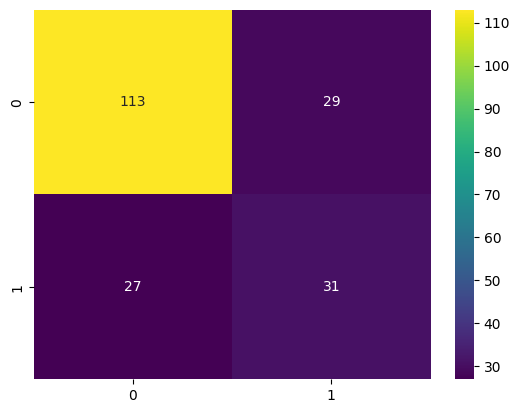

In [18]:
import seaborn as sns
from sklearn import metrics
# Predicting the Test set results
# Send the test data through the trained model
y_pred = classifier.predict(X_test)
# Model Accuracy, how often is the classifier correct?
# Here I have chosen 0.5 as the cut-off value
# If it is more than 0.5 then I have assigned it 1 otherwise 0
# y_test has the actual class information which we will compare the predicted class information
y_pred = (y_pred > 0.5)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,cmap = 'viridis', annot = True, fmt='');